In [35]:
#Importing Libraries
import pandas as pd
import nltk
import numpy as np

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
# Download NLTK resources
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# # Load data from CSV files
# company1_data = pd.read_csv('/content/BAJAJ CSV.csv')
# company2_data = pd.read_csv('/content/OLA CSV.csv')
# company3_data = pd.read_csv('/content/TVS CSV.csv')
# company1_data.rename(columns={'COMPANY': 'Company'}, inplace=True)
# # Concatenate data into a single DataFrame
# all_data = pd.concat([company1_data, company2_data, company3_data])

all_data=pd.read_excel('/content/Company_wise_reiews_250.xlsx')

In [5]:
all_data.head()

,Company,Review
0,OLA,On the very first day of delivery of my ola s1...
1,OLA,Worst and pathetic.In first month itself you w...
2,OLA,Positive - shock absorber and pickup negative ...
3,OLA,"I have purchased s1 pro gen 2 few days back, B..."
4,OLA,Worse experience seem like i made a mistake in...


In [15]:
# Preprocessing

# Function to clean and preprocess text
def clean_and_preprocess_text(text):
    # Define a regular expression pattern to match characters that are not alphanumeric or punctuation
    weird_pattern = r'[^a-zA-Z0-9\s,.?!]'
    # Use the sub() function to replace all characters not matching the pattern with an empty string
    clean_text = re.sub(weird_pattern, '', text)
    # Define a regular expression pattern to match non-ASCII characters
    non_ascii_pattern = r'[^\x00-\x7F]'
    # Use the sub() function to replace all non-ASCII characters with an empty string
    clean_text = re.sub(non_ascii_pattern, '', clean_text)

    # Preprocess the cleaned text by removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(clean_text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_tokens)

# Apply the function to the 'text' column
all_data['cleaned_text'] = all_data['Review'].apply(clean_and_preprocess_text)

In [56]:
#---------------Word Cloud

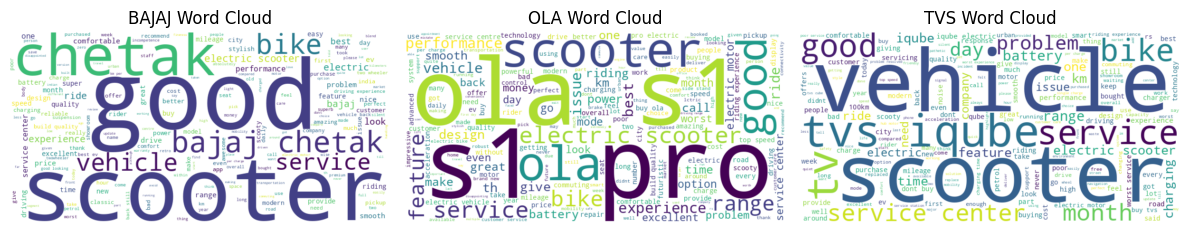

In [16]:
# Filter data for each firm
bajaj_reviews = all_data[all_data['Company'] == 'BAJAJ']['cleaned_text'].str.cat(sep=' ')
ola_reviews = all_data[all_data['Company'] == 'OLA']['cleaned_text'].str.cat(sep=' ')
tvs_reviews = all_data[all_data['Company'] == 'TVS']['cleaned_text'].str.cat(sep=' ')

# Generate word clouds
wordcloud_bajaj = WordCloud(width=800, height=400, background_color ='white').generate(bajaj_reviews)
wordcloud_ola = WordCloud(width=800, height=400, background_color ='white').generate(ola_reviews)
wordcloud_tvs = WordCloud(width=800, height=400, background_color ='white').generate(tvs_reviews)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_bajaj, interpolation='bilinear')
plt.title('BAJAJ Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_ola, interpolation='bilinear')
plt.title('OLA Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_tvs, interpolation='bilinear')
plt.title('TVS Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [58]:
#--------------------------TF-IDF and LDA-----------------------------------------#

In [59]:
# Function to perform TF-IDF analysis and LDA for a given company's text data
def tfidf_and_lda(company_data):
    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(company_data['cleaned_text'])

    # LDA Model
    lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_topics = lda_model.fit_transform(tfidf_matrix)

    # Get top keywords for each topic
    def get_top_keywords(model, vectorizer, n_words):
        keywords = []
        for topic_idx, topic in enumerate(model.components_):
            top_keywords_idx = topic.argsort()[:-n_words - 1:-1]
            keywords.append([vectorizer.get_feature_names_out()[i] for i in top_keywords_idx])
        return keywords

    # Get top keywords for each topic
    lda_keywords = get_top_keywords(lda_model, tfidf_vectorizer, 10)

    # Print topics and keywords
    print("LDA Topics and Keywords:")
    for idx, topic in enumerate(lda_keywords):
        print(f"Topic {idx+1}: {', '.join(topic)}")

# Perform TF-IDF analysis and LDA for each company
for company_name, company_data in all_data.groupby('Company'):
    print(f"\n{company_name} Analysis:")
    tfidf_and_lda(company_data)



BAJAJ Analysis:
LDA Topics and Keywords:
Topic 1: service, scooty, better, good, scooter, chetak, best, problem, worst, customer
Topic 2: good, scooter, chetak, electric, bajaj, nice, drive, ride, range, best
Topic 3: vehicle, service, center, took, incompetence, properly, weeks, ages, zero, avoid
Topic 4: bike, amazing, driving, bajaj, scooter, cost, buy, experience, chetak, model
Topic 5: awesome, experience, smooth, chetak, purchased, body, bajaj, fixed, love, till

OLA Analysis:
LDA Topics and Keywords:
Topic 1: service, bike, issues, vehicle, ola, scooter, good, day, issue, year
Topic 2: scooter, good, s1, electric, pro, ola, features, experience, range, like
Topic 3: best, nice, scooty, india, new, pickup, electric, power, speed, bike
Topic 4: product, smooth, vehicle, nice, ola, better, awesome, scooty, road, bike
Topic 5: service, th, ola, centre, customer, scooter, ev, worst, lctric, dont

TVS Analysis:
LDA Topics and Keywords:
Topic 1: problem, tvs, service, buy, dont, vehic

In [ ]:
#--------------------------------------------Coherence Attempt

In [27]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

In [46]:
def tfidf_and_lda(company_data):
    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(company_data['cleaned_text'])

    # Create a gensim Dictionary
    dictionary = Dictionary([doc.split() for doc in company_data['cleaned_text']])

    # Convert the TF-IDF matrix to a corpus in gensim format
    corpus = [dictionary.doc2bow(doc.split()) for doc in company_data['cleaned_text']]

    # Tokenized text data for coherence model
    tokenized_texts = [doc.split() for doc in company_data['cleaned_text']]

    # Evaluation of different numbers of topics
    coherence_scores = []
    for n_topics in range(2, 11):
        # Train LDA model
        lda_model = LdaModel(corpus, num_topics=n_topics, id2word=dictionary)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_score)



    # Plot coherence scores for different numbers of topics
    plt.plot(range(2, 11), coherence_scores)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.title("Coherence Score vs. Number of Topics")
    plt.show()

    optimal_n_topics = np.argmax(coherence_scores) + 2
    print(f"Optimal number of topics: {optimal_n_topics}")


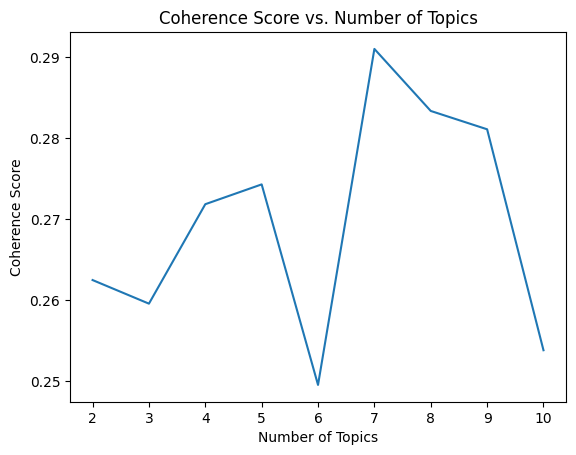

Optimal number of topics: 7


In [47]:
tfidf_and_lda(all_data)

In [48]:
# Function to perform TF-IDF analysis and LDA for a given company's text data
def tfidf_and_lda(company_data):
    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(company_data['cleaned_text'])

    # LDA Model
    lda_model = LatentDirichletAllocation(n_components=7, random_state=42)
    lda_topics = lda_model.fit_transform(tfidf_matrix)

    # Get top keywords for each topic
    def get_top_keywords(model, vectorizer, n_words):
        keywords = []
        for topic_idx, topic in enumerate(model.components_):
            top_keywords_idx = topic.argsort()[:-n_words - 1:-1]
            keywords.append([vectorizer.get_feature_names_out()[i] for i in top_keywords_idx])
        return keywords

    # Get top keywords for each topic
    lda_keywords = get_top_keywords(lda_model, tfidf_vectorizer, 10)

    # Print topics and keywords
    print("LDA Topics and Keywords:")
    for idx, topic in enumerate(lda_keywords):
        print(f"Topic {idx+1}: {', '.join(topic)}")

# Perform TF-IDF analysis and LDA for each company
for company_name, company_data in all_data.groupby('Company'):
    print(f"\n{company_name} Analysis:")
    tfidf_and_lda(company_data)



BAJAJ Analysis:
LDA Topics and Keywords:
Topic 1: service, chetak, zero, staff, problem, new, worst, customer, days, old
Topic 2: good, bike, nice, super, best, charging, scooter, drive, driving, chetak
Topic 3: service, vehicle, center, took, scooty, incompetence, properly, weeks, ages, issue
Topic 4: electric, scooter, bajaj, chetak, best, india, like, design, space, price
Topic 5: awesome, smooth, experience, built, body, driving, good, till, class, easy
Topic 6: buy, looking, bikes, ev, bad, vehicle, range, available, dont, poor
Topic 7: chetak, scooter, good, comfortable, drive, better, bajaj, ride, absolutely, best

OLA Analysis:
LDA Topics and Keywords:
Topic 1: bike, vehicle, ola, service, issues, worst, day, scooter, customer, center
Topic 2: good, scooter, electric, s1, pro, ola, best, range, features, experience
Topic 3: new, highly, multiple, breakdown, know, plan, 80, cost, used, worst
Topic 4: scooty, goes, repair, accident, warranty, ola, dont, centre, old, awesome
Topi

In [ ]:
#-----------------------------------------Coherence Attempt End

In [ ]:
#---Sentiment Analysis using Roberta Model

In [10]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [14]:
example ='On the very first day of delivery of my ola s1 x+ i had a very disappointing experience with ola electric and i feel compelled to share my negative review.Firstly, The customer service was absolutely atrocious.I had multiple issues with my ola electric vehicle the main issue after riding it back home for 25km approx it didn’t start and stopped moving, Rest all electricals were fine but it was not moving in any mode and when i tried to contact customer support, I was met with long wait times and unhelpful representatives.It was incredibly frustrating to not be able to get a timely resolution to my problems on a very first day of delivery.Furthermore, The pricing of ola electric vehicles is exorbitant.I was under the impression that i would be getting a high-quality, Reliable electric vehicle for a reasonable price.However, I found that the cost of ola electric vehicles is significantly higher than other comparable options on the market.Considering the numerous issues i experienced on a very first day, I definitely did not get my money’s worth.Overall, My experience with ola electric is extremely disappointing on a very first day of delivery.The lack of customer support, Poor quality of the vehicle, And high pricing make it impossible for me to recommend this brand to anyone.I would strongly advise against purchasing an ola electric vehicle and exploring other options that offer better value and reliability.'

In [22]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Define a function to compute sentiment scores for a given text
def compute_sentiment(text):
    # Tokenize the text
    encoded_text = tokenizer(text, return_tensors='pt') # truncation=True, padding=True, max_length=512)
    # Pass the tokenized text through the model
    output = model(**encoded_text)
    # Get the scores
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

# Apply sentiment analysis to each review
sentiment_scores = all_data['cleaned_text'].apply(compute_sentiment)

# # Combine sentiment scores with the original dataframe
df_with_sentiment = pd.concat([all_data, sentiment_scores.apply(pd.Series)], axis=1)

# print(df_with_sentiment)

In [27]:
avg_sentiment = df_with_sentiment.groupby('Company').agg({'roberta_neg': 'mean', 'roberta_neu': 'mean', 'roberta_pos': 'mean'})

In [31]:
avg_sentiment

,roberta_neg,roberta_neu,roberta_pos
Company,,,
BAJAJ,0.201327,0.206754,0.591919
OLA,0.196553,0.192811,0.610636
TVS,0.401724,0.297504,0.300772


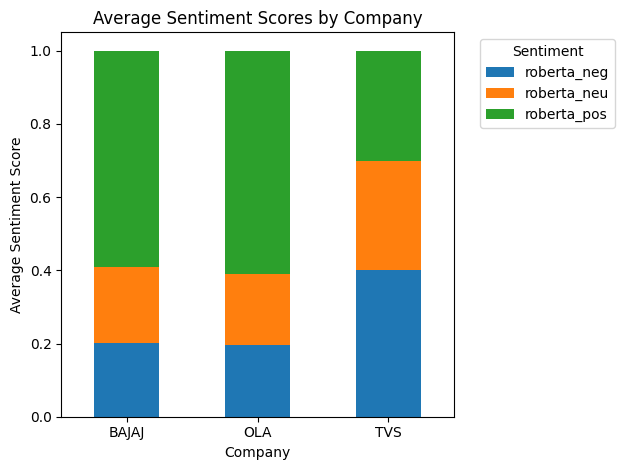

In [30]:
#avg_sentiment.set_index('Company', inplace=True)

# Plotting
avg_sentiment.plot(kind='bar', stacked=True)
plt.title('Average Sentiment Scores by Company')
plt.xlabel('Company')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

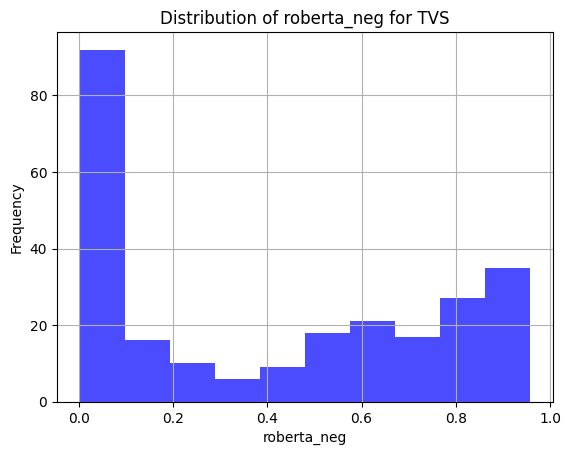

In [37]:
TVS_df = df_with_sentiment[(df_with_sentiment.Company == "TVS")]
plt.hist(TVS_df['roberta_neg'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of roberta_neg for TVS')
plt.xlabel('roberta_neg')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [48]:
TVS_df

,Company,Review,cleaned_text,roberta_neg,roberta_neu,roberta_pos
251,TVS,Very nice look and disc brake very big wheel s...,nice look disc brake big wheel size digital meter,0.009001,0.179014,0.811985
252,TVS,"A combination of good speed, great comfort, en...","combination good speed , great comfort , energ...",0.004283,0.126450,0.869267
253,TVS,I've been riding the tvs iqube electric scoote...,ive riding tvs iqube electric scooter several ...,0.004738,0.074028,0.921234
254,TVS,"Transform my commute with the TVS iQube, a rev...","transform commute tvs iqube , revolutionary el...",0.003413,0.131146,0.865441
255,TVS,This is the best scooter i have ever purchased...,best scooter ever purchased purchased scooter ...,0.011352,0.073564,0.915085
...,...,...,...,...,...,...
497,TVS,First 7k kms no issues.\nLater rear wheel had ...,first 7k kms issues . later rear wheel bend wa...,0.460087,0.492243,0.047669
498,TVS,I brought iqube in march 2021 used for about 1...,brought iqube march 2021 used 1400 kms motor d...,0.902317,0.087815,0.009868
499,TVS,I bought tvs iqube on sep 14 2021 and within o...,bought tvs iqube sep 14 2021 within one week d...,0.599448,0.366264,0.034288
500,TVS,"Hello,\nI purchased tvs iqube in march 2021, i...","hello , purchased tvs iqube march 2021 , run 3...",0.531817,0.367711,0.100472


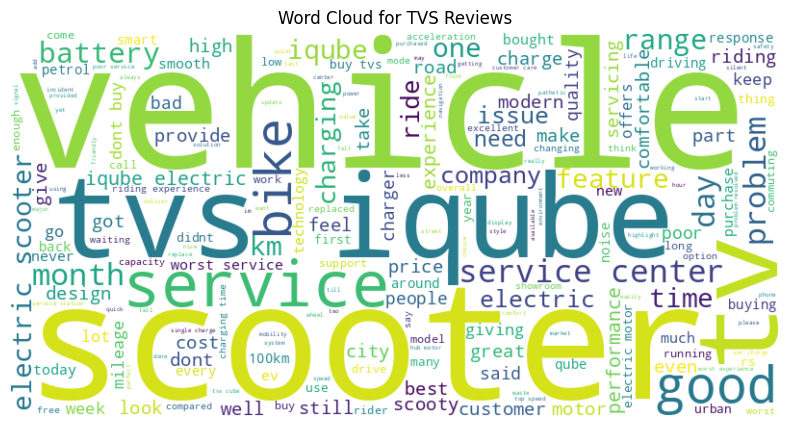

In [49]:
text = ' '.join(TVS_df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for TVS Reviews')
plt.axis('off')
plt.show()

In [11]:
all_data.head()

,Company,Review
0,OLA,On the very first day of delivery of my ola s1...
1,OLA,Worst and pathetic.In first month itself you w...
2,OLA,Positive - shock absorber and pickup negative ...
3,OLA,"I have purchased s1 pro gen 2 few days back, B..."
4,OLA,Worse experience seem like i made a mistake in...


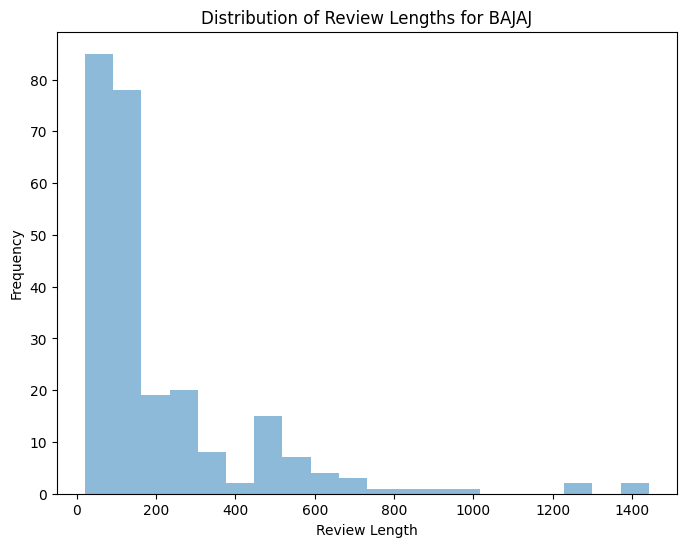

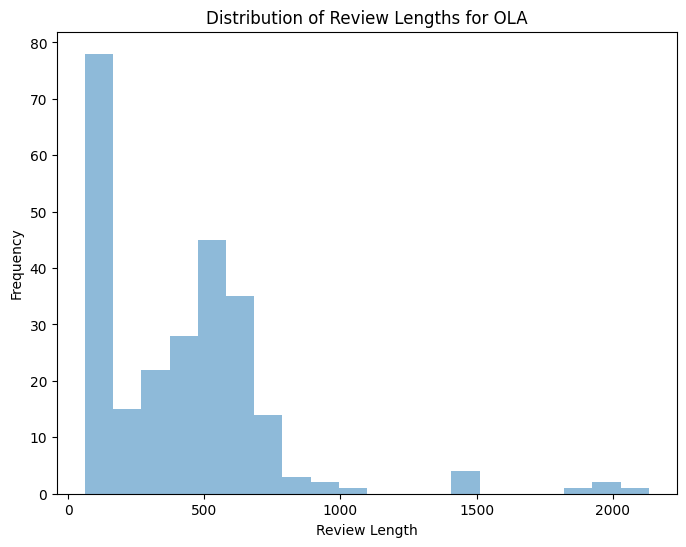

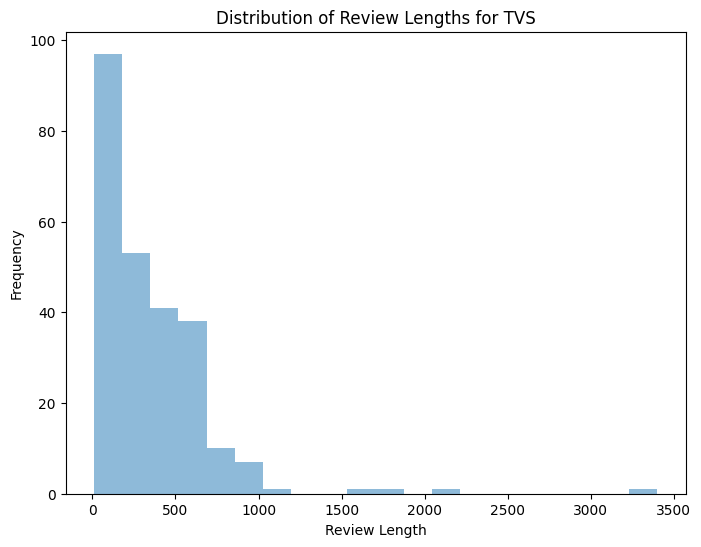

In [13]:
import matplotlib.pyplot as plt

# Calculate the length of each review
all_data['review_length'] = all_data['Review'].apply(len)  # For character count

# Group reviews by company
company_groups = all_data.groupby('Company')

# Create a separate plot for each company
for company, group in company_groups:
    plt.figure(figsize=(8, 6))
    plt.hist(group['review_length'], bins=20, alpha=0.5)
    plt.title(f'Distribution of Review Lengths for {company}')
    plt.xlabel('Review Length')
    plt.ylabel('Frequency')
    plt.show()
